<a href="https://colab.research.google.com/github/rahmahkn/CNS_Lab/blob/main/CNS_Lab0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

# **Introduction to Differential Equations and Dynamical Systems**

---

#### *Learning outcomes*

1. Understand the concept of a **differential equation/dynamical system**
2. Learn how to **analytically solve** a simple class of differential equations
3. Learn how to **numerically approximate** the solution to differential equations, and compare and contrast the advantages and disadvantages of different numerical methods
4. Learn how to **plot, visualise, and interpret** the solutions to simple differential equations
5. **Understand how the qualitative behaviour** of a dynamical system can depend on its parameters, and how mathematical and numerical techniques can be used to investigate this

# Introduction

Throughout this course, you will encounter models of the brain at different levels of abstraction, ranging from detailed biophysical descriptions of single neurons to models of large-scale neural networks or interacting brain regions. Regardless of the neural components being described, many of the models in this course will be written in terms of *differential equations* (or dynamical systems), which is a very general mathematical framework for modelling the evolution of a physical system in time. Differential equations are used widely in various scientific domains (physics, biology, chemistry, economics, finance etc.), and are becoming an increasingly popular tool in machine learning [1]. They are therefore a valuable tool to learn beyond their specific application to computational neuroscience in this course.  

</br>
</br>

<p align="center" width="100%">
<img src="https://drive.google.com/uc?id=1tboVVzbOqTS4QINCzO4-Hd1gEKh-Kqqc" width="220px;">
</p>

*Figure 1: Differential equations describe the evolution of a system in time [2]. For us, this system might describe the voltage across a neuron's cell membrane and its changes due to the flow of ions into or out of the cell, or the dynamics of a network of interacting neurons.*

</br>

In the first part of this course, we will focus on single neuron models. We will mathematically and numerically analyze differential equations describing the voltage across a neuron's cell membrane. From there, we will begin to consider the behaviour of interconnected networks of neurons and develop the tools to describe the dynamics of such networks as a system of coupled differential equations. This will allow us to investigate the relationship between the activity of a network of neurons and higher-level concepts such *perception*, *cognition*, and *behaviour*. In the third part of the course, we will consider how the brain evolves over slow timescales (e.g. learning or when storing and consolidating memories) through changes in its *synapses* (modelled again via systems of differential equations). Finally, motivated by recent experimental advances which have enabled recordings from thousands of neurons simultaneously in behaving animals, we will provide a brief introduction to modern neural data analysis methods which combine techniques from dynamical systems theory and machine learning.

</br>
</br>

<p align="center" width="100%">
<img src="https://drive.google.com/uc?id=18_blspwA_jkmKMSRehw_BCEbNF-hPps7" width="550px;">
</p>

*Figure 2: We will use differential equations to model both single neurons and networks of neurons.* *Left:* *The change in the voltage across a neuron's cell membrane in response to an external current can be modelled as an electrical circuit described by a simple differential equation (see equation) [3]. You will explore that in Labs 1 and 2.* *Right:* *Neurons in certain brain regions become active when an animal faces a particular direction in its environment. The neural computations underlying this property can be modelled using a so-called ring network described as a system of coupled differential equations (see equation) [4,5]. You will build such network in Lab 3.*

</br>

In this lab you will be introduced to differential equations. The purpose of this lab is twofold. First, we will cover the basics of differential equations, giving you the analytical and numerical tools required to work with the models you will encounter throughout this course and beyond. Second, we will introduce scientific computing in Python through the numpy and matplotlib libraries, giving you the programming tools to implement and simulate models, analyze data, and generate scientific plots. Mathematical derivations are provided throughout the tutorial — you are encouraged to work through these, but you can skip these if you prefer to proceed to the next section.

Please bear in mind that this is "*lab 0*", and it is therefore different in nature from other labs in the course. Whereas this lab exclusively covers mathematics and coding, future labs will be more closely focused on the implementation and investigation of models of the brain functions that we cover in lectures. This lab is designed to ensure that you have the necessary tools and knowledge for the later labs, and for the assessed coursework.

# Ordinary Differential Equations



We start by considering what is perhaps the simplest example of a differential equation. We consider a scalar function $x(t)$ which obeys the following equation:
\begin{aligned}
\frac{dx}{dt} = ax
\end{aligned}

This equation is an example of an ordinary differential equation (ODE - in contrast to partial differential equations, or PDEs). Our goal is to solve the equation to find $x(t)$ (note that the solution is a whole function, i.e. we find $x(t)$ for all of $t$, not just one time point).


### Analytical Solution: Separation of Variables

We can solve this equation analytically using a method called [method of separation of variables](https://en.wikipedia.org/wiki/Separation_of_variables):

\begin{aligned}
\frac{1}{x}dx &= adt
\\\implies\int \frac{1}{x}dx &= \int adt
\end{aligned}
The equation is now in a form that we know how to solve, and the solution is:
\begin{aligned}
\ln (x)+c_1 &= at + c_2
\\\implies x(t)&=c_3e^{at}
\end{aligned}

where $c_1,c_2,c_3$ are arbitrary constants arising from integration. The above derivation was an informal one, but this turns out to be the correct solution to the ODE. Most ODEs can't be solved so easily!

Note that the solution obtained above involves a free parameter $c_3$, and so defines a whole family of solutions to the ODE. If we are additionally provided an initial condition, $x(0)=x_0$, we can find a particular solution to the ODE:
\begin{aligned}
x(0)&=x_0=c_3e^{a\cdot 0}
\\ \implies x(t)&=x_0e^{at}
\end{aligned}

With this solution in hand, we can now plot the solution. We plot the solution for $t\in [0,1]$, $x_0=1$ and various values of $a$. The code below shows how to plot these solutions using matlotlib (imported here as plt). Try varying the initial condition $x_0$ and see how the solutions change.


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn
seaborn.set()

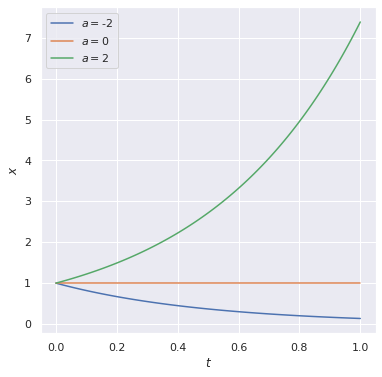

In [ ]:
plt.figure(figsize=(6,6))

#arange(a,b,h) returns a numpy array a, a+h, ... up to b excluded (hence the +0.01)
t = np.arange(0,1+0.01,0.01)
a_s = [-2,0,2]

for a in a_s:
  x = 1*np.exp(a*t)
  plt.plot(t, x, label='$a=$'+str(a))

plt.xlabel('$t$')
plt.ylabel('$x$')
plt.legend()
plt.show()

# Numerical Solution: Time Discretization

Consider the more general class of ODEs $\frac{dx}{dt} = f(x)$ for some continuous function $f$. Many such differential equations cannot be solved *analytically* as we did above. However, we can still find an approximate *numerical* solution. There are many numerical methods for solving ODEs. Here, we consider the simplest one, called the Euler method. Intuitively, the idea behind this method is to write $dx = f(x) dt$, and iteratively update the equation via $x(t+dt) = x(t) + f(x) dt$, where $dx$ and $dt$ are very small. We make this idea more formal below.  

## The Euler Method

Euler’s method is the most elementary numerical approximation technique for solving initial-value problems (IVPs), where we are given an initial condition $x(0)$ and an ODE describing the evolution through time. To solve the ODE over some time interval $t\in[0, T]$, we divide the time interval into a discrete set of evaluation time points of spacing $h$, i.e. $t_i=ih$, with $i = 1, 2,..., N$, and $Nh=T$. The spacing $h$ is called the timestep, sometimes written as $\delta t$, $\Delta t$, or $dt$.

To better understand how this method works, we perform a Taylor expansion:

\begin{aligned}
x(t_i+\delta t)&= x(t_i)+ \frac{dx}{dt}\bigg \rvert_{t=t_i} \delta t +O(\delta t^2)
\end{aligned}

setting $\frac{dx}{dt}\bigg \rvert_{t=t_i}=f(t_i)$ and $\delta t = h$ gives:

\begin{aligned}
x(t_{i+1}) = x(t_i)+hf(x(t_i)) +O(h^2)
\end{aligned}

Thus, for sufficiently small $h$ we have $x(t_{i+1}) \approx x(t_i) + h f(x(t_i))$. Starting from an initial condition $x(0)$, this allows us to numerically estimate the values of the solution to the IVP on the evaluation points $\{0,t_1,..., T\}$. The Euler method is not exact, but its accuracy increases as $h$ is decreased. This sets a tradeoff with the Euler method - smaller step sizes increase numerical precision, but increase computation time.


## Exercise 1.1 $-$ Euler Solver
Code a Euler numerical solver. The template of the solver is already given bellow, do not alter it.

To make this method more general, you can allow 1) the step size to vary, i.e. $h_i = t_{i+1}-t_i$,  2) $f$ to take time as an argument, so that $\frac{dx}{dt} = f(t,x)$, and 3) $\mathbf{x}(t)$ be an N-dimensional vector rather than a scalar.

In [ ]:
def euler(f, x0, t):
  """
  in:
  f: python function which takes a N dimensional ndarray and returns an N dimensional ndarray
  x0: N dimensional ndarray
  t: T dimensional ndarray such that ts[i]>0 and ts[i+1]>ts[i]

  out:
  x: TxN dimensional ndarray
  """

  x = np.empty([len(t), len(x0)])
  # Solution:


  return x

## Exercise 1.2 $-$ Effect of Step Size

To test the performance of the Euler method, you will now compare it to the analytic solution obtained for the ODE above using separation of variables. You will test how numerical accuracy depends on step size by comparing to the analytic solution.

Make a plot containing four curves: the analytic solution and the numeric solutions for $h\in [1.0, 0.5, 0.25, 0.125]$. Color each curve to visualise the results.

Choose:

*   $a=1$
*   $x_0=1$
*   $t\in [0,5]$

Make sure to use the Euler function you coded above. You will need to write the correct `f`.

Hints:

* Because the Euler function created above takes in ndarrays, `x` should be given as a 1-dimensional ndarray, not a scalar.
* You can use `np.arange(min, max+step, step)` to create your set of evaluation points.

In [ ]:
# Solution :

We see that the accuracy improves as the step size $h$ is decreased.

## Higher Order Numerical Methods

The Euler method is one of the simplest methods available, but not always the "best". There exist higher order methods which can improve numerical precision and stability, the most well known of which are RK4, Dopri. They rely on similar principles to the Euler method, but including higher-order terms in the Taylor expansion.

Such methods may automatically determine the evaluation points $t_i$ and associated step sizes $h_i$ - the so-called "adaptive step methods" (now popular in deep learning applications).

The details of these methods will not be covered here. You may refer to [2]. Here, we simply show how such methods may be used by calling standard library functions in Python.

## SciPy

Conveniently, the `euler` template function provided above was the same as that of scipy's `solve_ivp`.





## Exercise 1.3 $-$ Using `solve_ivp`

Remake the plot of exercise 1.2, but include a curve for the following call:


```
from scipy.integrate import solve_ivp
solution = solve_ivp(f, [0,T], x0, t_eval=np.arange(0,T,1))
t = solution.t
x = solution.y
```

By default, `solve_ivp` (formerly `odeint`) will use RK45 and adaptive steps.

In [ ]:
# Solution :


As you can see, solve_ivp evaluates the function at fewer points (here, 5), and the error is much lower than with Euler.

# A More Complex ODE: Adding Input

Above we considered a very simple ODE in order to illustrate the key concepts. A slightly more complex version of the above ODE can be obtained by adding an "input" or drive that influences $x$:

\begin{aligned}
\frac{dx}{dt} = a x + b(t)
\end{aligned}

This ODE will crop up constantly throughout this course. It turns out that separation of variables doesn't work in this case (try it out and see!) However, another technique can be used called the [method of integrating factors](https://en.wikipedia.org/wiki/Integrating_factor). With this method, we multiply both sides of the ODE with some cleverly chosen function which allows a solution to be found. For the ODE above, we can write:

\begin{aligned}
&&e^{-at}\frac{dx}{dt} &= e^{-at} (a x + b(t))
\\ \implies&& \frac{d}{dt}\left( e^{-at} x\right) &= e^{-at} b(t) \hspace{1cm} \left(\mathrm{since} \hspace{0.5cm} \frac{d}{dt}\left( e^{-at} x\right) = -ae^{-at} + e^{-at} \frac{dx}{dt}  \right)
\\ \implies&& \int_0^t \frac{d}{d\tau}\left( e^{-a\tau} x(\tau)\right) d\tau &= \int_0^t e^{-a\tau} b(\tau) d\tau
\\ \implies&& e^{-at} x(t) - e^{-a \cdot 0} x(0) &= \int_0^t e^{-a\tau} b(\tau) d\tau  \hspace{1cm} \left(\mathrm{since} \hspace{0.5cm} \int_a^b f(x)dx = f(b) - f(a)  \right)
\\ \implies&& x(t) &= e^{at} x_0 + \int_0^t e^{a(t-\tau)} b(\tau) d\tau
\end{aligned}

In this case, we have an analytical solution involving an integral, and this integral cannot always be solved analytically. In such cases, rather than solving the integral numerically, we typically solve the ODE directly using the Euler method.

##Exercise 2 $-$ Sinusoidal Input

As an exercise, try solving the above ODE numerically with $b(t) = b_0 \sin (\omega t)$ (set $a=-1$, $b_0 = 1$, $\omega = 10$, $x_0 = 0$, $t\in[0,5]$). In fact, this example can also be solved [analytically](https://www.wolframalpha.com/input?i=integrate%28e%5E%28a*%28t-y%29%29+*+sin%28b*y%29+dy%2C+y%3D0%2C+t%29), so numerical techniques are not necessary in this case.


In [ ]:
# Solution :

# Dynamical Systems

A dynamical system is a system whose state variables evolve in time according to a given rule (i.e., function). The examples we considered above were already dynamical systems, but we are now particularly interested in the case where there are multiple state variables (e.g., the activity of multiple neurons), so that $\mathbf{x}$ becomes a vector. In particular, we consider systems that can be written as

\begin{aligned}
\dot {\bf x}=f({\bf x}, t)
\end{aligned}
with ${\bf x}(t)\in \mathbb{R}^n$ and $\dot {\bf x} = \frac{d\mathbf{x}}{dt} $.

If this vector notation feels unfamiliar to you, simply note that $\dot{x}_i = f(x_1,x_2,...,x_n,t)$ for $i\in \{1,2,...,n\}$, so that this is just a set of $n$ coupled ODEs, where each ODE acts as "input" to the other ones. An example of such a system could be a network of neurons, where each neuron communicates with other neurons it is coupled to.


## Linear Dynamical Systems

A very important class of dynamical systems in neuroscience is that of [linear dynamical systems](https://en.wikipedia.org/wiki/Linear_dynamical_system):

\begin{aligned}
\dot {\bf x} = W{\bf x} +  \mathbf{u}(t)
\end{aligned}

with ${\bf u}\in \mathbb{R}^n$, with $W\in \mathbb{R}^{n \times n}$.
This is the vector/matrix version of the ODE with input considered above, and the solution to this sytem can be derived in much the same way:
\begin{aligned}
\\{\bf x}(t) &= e^{Wt}{\bf x}_0 + \int_{0}^t e^{W(t-\tau)}{\bf u}(\tau)d\tau
\end{aligned}
where the *matrix exponential* is defined as $e^{Wt}=\sum_{i=0}^\infty \frac{W^it^i}{i!}$ (in analogy to the usual exponential function for scalars $e^{at} = \sum_{i=0}^{\infty} \frac{a^it^i}{i!}$).

The dynamics of ${\bf x}$ depends on the properties of the matrix $W$, such as its eigenvalues and eigenvectors, symmetry vs asymmetry/antisymmetry, etc. There is a vibrant literature relating these different kinds of dynamics to the behaviour of neural networks, and one could devote a whole course to this topic. We provide one example below, showing how antisymmetric $W$ (i.e. $W^T = -W$) leads to oscillations in the dynamics while symmetric $W$ (i.e. $W^T = W$) leads to so-called attractor dynamics in which activity quickly decays towards a fixed value.


# Exercise 3 $-$ Oscillatory vs Attractor Dynamics

To conclude, we now numerically solve and visualise a simple linear dynamical system. We consider how the properties of the weight matrix influence the resulting dynamics.

Implement the following dynamical system and evaluate it with `solve IVP`,

\begin{aligned}
\dot {\bf x} = W{\bf x}
\end{aligned}

where, ${\bf x}(t)\in \mathbb{R}^3$, ${\bf x}(0)=\begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix} $.

Generate the weight matrix as follows:

\begin{aligned}
W = \alpha_{symm}(B + B^T) + (1-\alpha_{symm})(B - B^T) - \alpha_{stable} I
\end{aligned}

where,
* $I$ is the identity matrix
* $B_{ij} \sim \mathcal{N}(0,1)$ is a random set of weights.

The parameter $\alpha_{symm}$ interpolates between a symmetric matrix ($\alpha_{symm}=1$) and an antisymmetric one ($\alpha_{symm}=0$). The parameter $\alpha_{stable}$ can be used to make the system more stable (i.e., so that $\mathbf{x}$ does not grow to very large values over time).

Tasks to complete:
1. Implement the correct `f` for this system.
2. Numerically evaluate the system with scipy's `solve IVP` function on $t\in [0,10]$.
3. Plot the resulting dynamics in a 3D space using matplotlib.
4. Try varying each $\alpha$ and see how it influences the solution.


Comment on what you observe - how do the two parameters influence the dynamics?

Note: Since we are now dealing with random variables, it is important to set the random *seed*. You can do this by including the code `np.random.seed(1)`. You can also test the effect of varying the random seed on the solution.

In [ ]:
# Solution :

# References

[1] Ricky T. Q. Chen, Yulia Rubanova, Jesse Bettencourt, and David Duvenaud. 2018. Neural ordinary differential equations. In Proceedings of the 32nd International Conference on Neural Information Processing Systems, 6572–6583.

[2] Vyas, S., Golub, M. D., Sussillo, D., & Shenoy, K. V. (2020). Computation through neural population dynamics. Annual review of neuroscience, 43, 249-275.

[3] Gerstner, W., Kistler, W. M., Naud, R., & Paninski, L. (2014). Neuronal dynamics: From single neurons to networks and models of cognition. Cambridge University Press.

[4] Evans, T., Bicanski, A., Bush, D., & Burgess, N. (2016). How environment and self‐motion combine in neural representations of space. The Journal of physiology, 594(22), 6535-6546.

[5] Chaudhuri, R., Gerçek, B., Pandey, B., Peyrache, A., & Fiete, I. (2019). The intrinsic attractor manifold and population dynamics of a canonical cognitive circuit across waking and sleep. Nature neuroscience, 22(9), 1512-1520.

[6] Burden, R. L., Faires, J. D., & Burden, A. M. (2015). Numerical analysis.